# Week 4 - Luis Aldeco:

The past few weeks have taught me a lot of short-term investing. The most important lesson I have learned, though, is that for short-term investing, high-risk companies that are already trending upward have the biggest payoffs. Sure, they may backfire, but in the course of this past month, more riskier investments have consistently done better.  

This week, Skechers and Cintas did great, whereas Lululemon did not.  

So for this last week, I'll try to go on high risk investments! And the data I will be choosing will be from the gaming industry. 

To begin analyzing the data I used this website as a beginning guide: [Tutorial](https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/)

To begin analysis, I must retrieve data from someplace. The data will be in csv format.
Then, I must have a plan as to how to handle data frames. For this I will use Pandas.

In [ ]:
!pip install datapackage
!pip install pandas
!pip install numpy
!pip install --upgrade keras
!pip install --upgrade tensorflow
!pip install --upgrade sklearn
!pip install matplotlib
!pip install yahoo-finance
!pip install matplotlib
!pip install yahoo_fin
!pip install requests_html
!pip install html5lib
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from pandas.plotting import scatter_matrix
!pip install yfinance
import yfinance as yf
%matplotlib inline
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si

Next I will use the same predictive analysis I did last week on the following companies:

1. EA
2. Nintendo
3. Take-Two
4. AVID
5. Activision

In [ ]:
# First read the initial data to get a better sense of how the data is comprised 
df=pd.read_csv("EA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

# Next we split up the value into training and test values
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#This will help normalize the data before we use LSTM to predict
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Creating the prediction model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Preparing test data to fit the model
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

#Actual Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price[1:]

# Displaying results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real EA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted EA Stock Price")
plt.xticks(np.arange(0,458,50))
plt.title('EA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('EA Stock Price')
plt.legend()
plt.show()

In [ ]:
# First read the initial data to get a better sense of how the data is comprised 
df=pd.read_csv("NTDOY.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

# Next we split up the value into training and test values
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#This will help normalize the data before we use LSTM to predict
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Creating the prediction model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Preparing test data to fit the model
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

#Actual Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price[1:]

# Displaying results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real Nintendo Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Nintendo Stock Price")
plt.xticks(np.arange(0,458,50))
plt.title('Nintendo Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nintendo Stock Price')
plt.legend()
plt.show()

Number of rows and columns: (1258, 7)


2021-12-11 01:48:48.942802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-11 01:48:48.942894: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-11 01:48:48.942944: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-beanbench-2d4650-2dmwr9c63e): /proc/driver/nvidia/version does not exist
2021-12-11 01:48:48.943526: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
24/24 [==============================] - 24s 592ms/step - loss: 0.0955
Epoch 2/100
24/24 [==============================] - 14s 592ms/step - loss: 0.0147
Epoch 3/100
24/24 [==============================] - 14s 574ms/step - loss: 0.0107
Epoch 4/100
24/24 [==============================] - 14s 570ms/step - loss: 0.0096
Epoch 5/100
24/24 [==============================] - 14s 587ms/step - loss: 0.0095
Epoch 6/100
24/24 [==============================] - 15s 609ms/step - loss: 0.0103
Epoch 7/100
24/24 [==============================] - 14s 587ms/step - loss: 0.0086
Epoch 8/100
24/24 [==============================] - 14s 600ms/step - loss: 0.0087
Epoch 9/100
24/24 [==============================] - 14s 595ms/step - loss: 0.0098
Epoch 10/100
24/24 [==============================] - 13s 534ms/step - loss: 0.0084
Epoch 11/100
24/24 [==============================] - 12s 492ms/step - loss: 0.0084
Epoch 12/100
24/24 [==============================] - 12s 494ms/step - loss: 0.0082
E

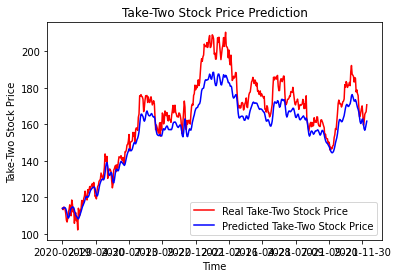

In [3]:
# First read the initial data to get a better sense of how the data is comprised 
df=pd.read_csv("TTWO.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

# Next we split up the value into training and test values
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#This will help normalize the data before we use LSTM to predict
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Creating the prediction model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Preparing test data to fit the model
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

#Actual Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price[1:]

# Displaying results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real Take-Two Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Take-Two Stock Price")
plt.xticks(np.arange(0,458,50))
plt.title('Take-Two Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Take-Two Stock Price')
plt.legend()
plt.show()

Number of rows and columns: (1258, 7)


2021-12-10 21:28:09.875223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-10 21:28:09.875303: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-10 21:28:09.875347: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-beanbench-2d4650-2dwmzdvrqs): /proc/driver/nvidia/version does not exist
2021-12-10 21:28:09.875892: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
24/24 [==============================] - 21s 539ms/step - loss: 0.0423
Epoch 2/100
24/24 [==============================] - 14s 579ms/step - loss: 0.0190
Epoch 3/100
24/24 [==============================] - 13s 552ms/step - loss: 0.0153
Epoch 4/100
24/24 [==============================] - 14s 591ms/step - loss: 0.0150
Epoch 5/100
24/24 [==============================] - 14s 578ms/step - loss: 0.0128
Epoch 6/100
24/24 [==============================] - 14s 565ms/step - loss: 0.0127
Epoch 7/100
24/24 [==============================] - 14s 574ms/step - loss: 0.0113
Epoch 8/100
24/24 [==============================] - 14s 563ms/step - loss: 0.0112
Epoch 9/100
24/24 [==============================] - 13s 527ms/step - loss: 0.0098
Epoch 10/100
24/24 [==============================] - 11s 468ms/step - loss: 0.0103
Epoch 11/100
24/24 [==============================] - 11s 456ms/step - loss: 0.0091
Epoch 12/100
24/24 [==============================] - 10s 420ms/step - loss: 0.0090
E

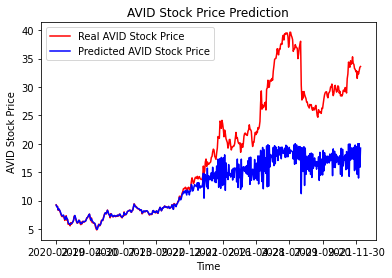

In [4]:
# First read the initial data to get a better sense of how the data is comprised 
df=pd.read_csv("AVID.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

# Next we split up the value into training and test values
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#This will help normalize the data before we use LSTM to predict
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Creating the prediction model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Preparing test data to fit the model
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

#Actual Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price[1:]

# Displaying results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real AVID Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted AVID Stock Price")
plt.xticks(np.arange(0,458,50))
plt.title('AVID Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AVID Stock Price')
plt.legend()
plt.show()

Number of rows and columns: (1258, 7)
Epoch 1/100
24/24 [==============================] - 20s 505ms/step - loss: 0.0518
Epoch 2/100
24/24 [==============================] - 13s 530ms/step - loss: 0.0155
Epoch 3/100
24/24 [==============================] - 11s 456ms/step - loss: 0.0108
Epoch 4/100
24/24 [==============================] - 11s 460ms/step - loss: 0.0095
Epoch 5/100
24/24 [==============================] - 12s 517ms/step - loss: 0.0090
Epoch 6/100
24/24 [==============================] - 11s 465ms/step - loss: 0.0086
Epoch 7/100
24/24 [==============================] - 11s 454ms/step - loss: 0.0076
Epoch 8/100
24/24 [==============================] - 12s 489ms/step - loss: 0.0071
Epoch 9/100
24/24 [==============================] - 10s 417ms/step - loss: 0.0080
Epoch 10/100
24/24 [==============================] - 10s 428ms/step - loss: 0.0063
Epoch 11/100
24/24 [==============================] - 11s 476ms/step - loss: 0.0068
Epoch 12/100
24/24 [===========================

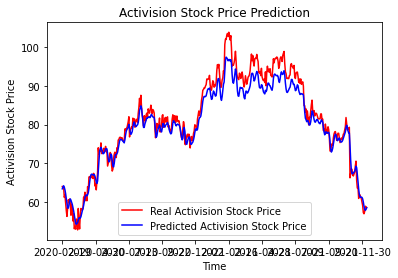

In [5]:
# First read the initial data to get a better sense of how the data is comprised 
df=pd.read_csv("ATVI.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

# Next we split up the value into training and test values
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#This will help normalize the data before we use LSTM to predict
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Creating the prediction model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Preparing test data to fit the model
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

#Actual Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price[1:]

# Displaying results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real Activision Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Activision Stock Price")
plt.xticks(np.arange(0,458,50))
plt.title('Activision Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Activision Stock Price')
plt.legend()
plt.show()

Next I will chart the Beta value of each company.

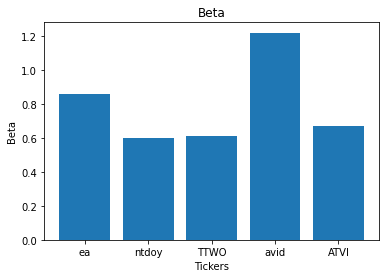

In [4]:
ticker_list = ["ea","ntdoy","TTWO","avid","ATVI"]
y = [si.get_quote_table("ea")["Beta (5Y Monthly)"],
    si.get_quote_table("ntdoy")["Beta (5Y Monthly)"],
    si.get_quote_table("TTWO")["Beta (5Y Monthly)"],
    si.get_quote_table("avid")["Beta (5Y Monthly)"],
    si.get_quote_table("ATVI")["Beta (5Y Monthly)"]
    ]

plt.bar(ticker_list, y)
plt.xlabel("Tickers")
plt.ylabel("Beta")
plt.title("Beta")
plt.show()

Based on the results, I will choose to pick Nintendo, Take-Two, and EA. Although they are not the highest in volatility, AVID's results just seem too risky based on the prediction.  
All three mentioned above seem like they will rebound and climb upwards.